## GTZAN Dataset Preparation & Features Computation 

In this jupyter notebook I will explain the preparation of the data as well as the preprocessing necessary in order to compute the features to be used to train a genre classifier.  

We are going to use the [GTZAN Genre Collection Dataset](http://marsyas.info/downloads/datasets.html), which consists of a total of 1000 audio clips of 30 seconds of duration. The clips are divided into 10 different musical genres (100 clips for each genre). The genres are:
* Blues 
* Classical
* Country
* Disco
* Hip-Hop
* Jazz
* Metal
* Pop
* Reggae
* Rock 

The first thing that should be done is to download the dataset and check out the file structure.

In [2]:
import os 
import tarfile

src_path = os.getcwd()
data_path = os.path.join(src_path, 'dataset')

os.makedirs(data_path, exist_ok=True)

## Download and extract audio files (uncomment if you dont have it installed)
#!wget http://opihi.cs.uvic.ca/sound/genres.tar.gz -c -P {data_path}
#!tar -xvf {data_path + '/genre.tar.gz'} -C {data_path}

# Delete the compressed dataset 
#!rm {data_path + '/genre.tar.gz'}

data_path = os.path.join(data_path, 'genre')

# Make sure you have command tree installed in UNIX OS systems. You can install it running !sudo apt-get install tree
!tree -L 1 {data_path}  

/mnt/e/carlos/code/epidemic-sound/genre-classif/dataset/genre
├── blues
├── classical
├── country
├── disco
├── hiphop
├── jazz
├── metal
├── pop
├── reggae
└── rock

10 directories, 0 files


We have a bunch of manifest files that tells us only information regarding the original audio used in GTZAN and its genre. We can delete those files.

In [9]:
#import pandas as pd
#df = pd.read_csv(data_path + '/bextract_single.mf', sep= "\t", header=None, names=['filename', 'genre'])

#pd.set_option('max_colwidth', 70)

#print(df[0:10])

#print(df[-5:-1])

# Deleting manifest files
#!rm {data_path + '/*.mf'}


Let's whats inside a genre directory.

In [10]:
!ls {data_path + '/blues'}

blues.00000.wav  blues.00025.wav  blues.00050.wav  blues.00075.wav
blues.00001.wav  blues.00026.wav  blues.00051.wav  blues.00076.wav
blues.00002.wav  blues.00027.wav  blues.00052.wav  blues.00077.wav
blues.00003.wav  blues.00028.wav  blues.00053.wav  blues.00078.wav
blues.00004.wav  blues.00029.wav  blues.00054.wav  blues.00079.wav
blues.00005.wav  blues.00030.wav  blues.00055.wav  blues.00080.wav
blues.00006.wav  blues.00031.wav  blues.00056.wav  blues.00081.wav
blues.00007.wav  blues.00032.wav  blues.00057.wav  blues.00082.wav
blues.00008.wav  blues.00033.wav  blues.00058.wav  blues.00083.wav
blues.00009.wav  blues.00034.wav  blues.00059.wav  blues.00084.wav
blues.00010.wav  blues.00035.wav  blues.00060.wav  blues.00085.wav
blues.00011.wav  blues.00036.wav  blues.00061.wav  blues.00086.wav
blues.00012.wav  blues.00037.wav  blues.00062.wav  blues.00087.wav
blues.00013.wav  blues.00038.wav  blues.00063.wav  blues.00088.wav
blues.00014.wav  blues.00039.wav  blues.00064.wav  blues.00089

All the genre directories look like these. We should have 100 clips for each genre class. Let's now investigate the audio files and check if everything is correct and there is nothing wrong with our data. Some things we will check:
* Do all files the same duration?
* Do all files have same number of channels?
* How many files we have for each class?

In [3]:
import librosa
import numpy as np
import pandas as pd

## Getting labels from dataset directories
paths = os.listdir(data_path)
labels = sorted(list(set([l for l in paths if os.path.isdir(os.path.join(data_path, l))])))

## Those are the labels (genres) we are going to work with
print('The classes for our genre classification algorithms are {}'.format(labels))

names = []
durations = []
channels = []
genres = []

# Veryfying Dataset
for l in labels:
    filedir = os.path.join(data_path, l)
    for filename in os.listdir(filedir):
        audio, fs = librosa.load(os.path.join(filedir, filename), sr=22050, mono=False)
        names.append(filename) # name of audio
        durations.append(max(audio.shape)) # duration of audio file
        channels.append(audio.ndim) # number of channels
        genres.append(l) # genre of this audio file

df = pd.DataFrame(list(zip(names,durations,channels, genres)), columns = ['Name', 'Duration', 'Channels', 'Genre'])

df.head(10)

The classes for our genre classification algorithms are ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


,Name,Duration,Channels,Genre
0,blues.00000.wav,661794,1,blues
1,blues.00001.wav,661794,1,blues
2,blues.00002.wav,661794,1,blues
3,blues.00003.wav,661794,1,blues
4,blues.00004.wav,661794,1,blues
5,blues.00005.wav,661794,1,blues
6,blues.00006.wav,661794,1,blues
7,blues.00007.wav,661794,1,blues
8,blues.00008.wav,661794,1,blues
9,blues.00009.wav,661794,1,blues


In [12]:
print('Minimum value of column Duration is {} = {:2.2f} sec, which happens at index {}'.format(df['Duration'].min(),
                                                                                        df['Duration'].min()/fs,
                                                                                        df['Duration'].idxmin()))
print('Maximum value of column Duration is {} = {:2.2f} sec, which happens at index {}'.format(df['Duration'].max(),
                                                                                        df['Duration'].max()/fs,
                                                                                        df['Duration'].idxmax()))
print('\n')
print(df.iloc[df['Duration'].idxmin()-1:df['Duration'].idxmin()+2])
print(df.iloc[df['Duration'].idxmax()-1:df['Duration'].idxmax()+2])
print('\n')

print('Minimum value of channel for an audio file is {}'.format(df['Channels'].min()))
print('Maximum value of channel for an audio file is {}'.format(df['Channels'].max()))

## Number of audio files in each Genre
print('\n')
print(' Number of audio in each Genre:')
print(df['Genre'].value_counts())

Minimum value of column Duration is 660000 = 29.93 sec, which happens at index 432
Maximum value of column Duration is 675808 = 30.65 sec, which happens at index 436


                 Name  Duration  Channels   Genre
431  hiphop.00031.wav    661408         1  hiphop
432  hiphop.00032.wav    660000         1  hiphop
433  hiphop.00033.wav    665280         1  hiphop
                 Name  Duration  Channels   Genre
435  hiphop.00035.wav    668140         1  hiphop
436  hiphop.00036.wav    675808         1  hiphop
437  hiphop.00037.wav    675808         1  hiphop


Minimum value of channel for an audio file is 1
Maximum value of channel for an audio file is 1


 Number of audio in each Genre:
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: Genre, dtype: int64


We verified that the actual duration of the audio files can range from 29.93s to 30.65s. Even though it is not the exact same number of samples, this won't be an issue when preparing our features because we can easily pad just miliseconds of the signals, so we won't be adding much silence or noise. 

The number of channels are always 1, so we don't need to worry with stereo signals. However, if they were stereo we could have even more data by analysing the left or right channel independly.

Furthermore, we have confirmed that there is 100 clips for each of the 10 classes. The daataset seems quite balanced in terms of samples per class, which is good.

Now, let's talk about the adopted methodology to implement the classifiers.

## Methodology

Instead of working with large 30-second audio clips, I decided to adopt the methodology of classifying the genre of a 5-second excerpt. This approach is good for __4__ main reasons:

* __Enough information___: A 5-second music excerpt should contain enough information for humans to make an overall decision about the music genre; 
* __Data Augmentation__: Each audio file now serves as 6 inputs for training our system. So, instead of having 1000 inputs, we can augment our data to 6000 samples;
* __Lower Feature Variance__: Features over a 5 second "texture window" have a lower variance, which helps training of ML models;
* __Smaller Inputs__: Spectrograms of a 5 second audio clip have lower dimensions and using smaller inputs is easier and recommended for training CNNs;

I believe it would be interesting to use deep learning models as well as traditional machine learning classifiers so we can evaluate and compare their performance. The techniques I am going to implement and compare are:

1- K-Nearest Neighbors
2- Decision Tree
3- SVM
4- Multi-layer Perceptron (Fully Connected Network)
5- Convolutional Neural Network (CNN)

Apart from CNN, which can be applied direcly on music spectrograms, the other methods need to be applied to features computed from our audio clips. So, it is portant to talk about the music features we can use.

## Choice of features

I believe we can choose features that are related to timbre, pitch and rhythm of the music signals. Some feature that I believe that can provide some useful insights regarding the music genre are:

* Spectral Centroid;
* Spectral Rolloff 85;
* Spectral Rolloff 10;
* Zero Crossing Rate;
* Low Energy Feature;
* Tempo;
* 5 Mel-Frequency Cepstral Coefficients

Since a music signal is a time domain signal, we are going to compute the average value of the features and their variance accross the chosen "texture window", which will be the 5-second clip.

Those features will be explained and exemplified in the next cells for two example signals. One from the genre *Jazz* and one from *Metal*.

   Jazz.00020


   Metal.00035


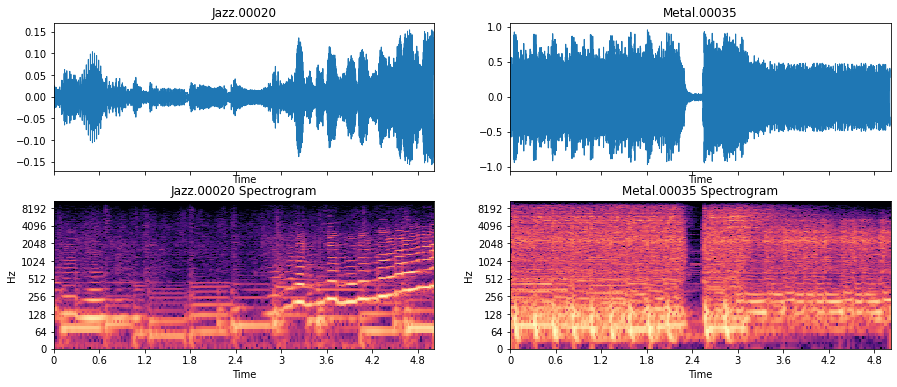

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

# Read Example Audio 1
y1, sr = librosa.load(os.path.join(data_path, 'jazz', 'jazz.00020.wav'), sr=22050, duration=5)
# Read Example Audio 2
y2, sr = librosa.load(os.path.join(data_path, 'metal', 'metal.00035.wav'), sr=22050, duration=5)

# Compute magnitude spectrograms (STFT)
S1, _ = librosa.magphase(librosa.stft(y=y1))
S2, _ = librosa.magphase(librosa.stft(y=y2))

times= librosa.times_like(S1, sr=sr) # center sample of frames (in sec)

# Plotting waveform and Spectrogram
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15,6))
librosa.display.waveplot(y1, sr=sr, ax=ax[0,0])
ax[0,0].set(title='Jazz.00020')
librosa.display.waveplot(y2, sr=sr, ax=ax[0,1])
ax[0,1].set(title='Metal.00035')

librosa.display.specshow(librosa.amplitude_to_db(S1, 
                                                 ref=np.max),
                                                 y_axis='log', 
                                                 x_axis='time', 
                                                 ax=ax[1,0])

librosa.display.specshow(librosa.amplitude_to_db(S2, 
                                                 ref=np.max),
                                                 y_axis='log', 
                                                 x_axis='time', 
                                                 ax=ax[1,1])

ax[1,0].set(title='Jazz.00020 Spectrogram')
ax[1,1].set(title='Metal.00035 Spectrogram')

# Playing audio
print('   Jazz.00020')
ipd.display(ipd.Audio(y1, rate=sr))
print('   Metal.00035')
ipd.display(ipd.Audio(y2, rate=sr))


### Spectral Centroid:

The __spectral centroid__ is defined as the center of gravity of the magnitude spectrum of a signal. The centroid of each frame of a spectrogram is computed to give some sort of measurement of spectral shape. Higher centroid values correspond to “brighter” textures with more high frequencies. 

The function `librosa.feature.spectral_centroid` can be used to compute this feature.

You can see an example below:

Average centroid for Jazz.00020 is 1094.55 Hz with std deviation 236.38 Hz
Average centroid for Metal.00035 is 2807.46 Hz with std deviation 532.69 Hz


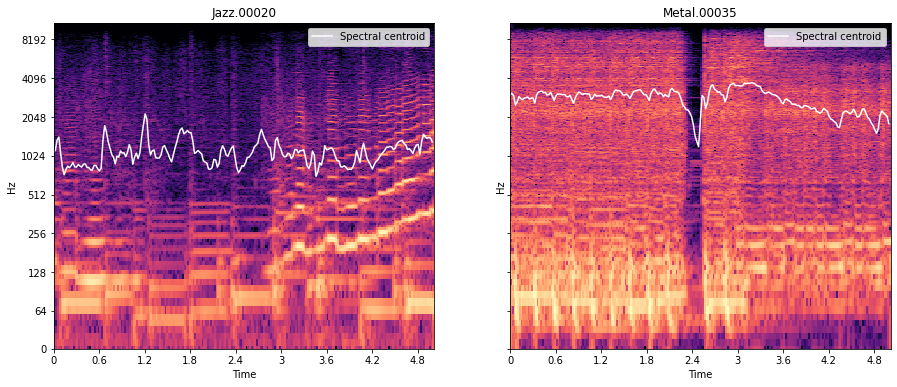

In [17]:
#%matplotlib inline
#import matplotlib.pyplot as plt
#import librosa.display

#y1, sr = librosa.load('./dataset/jazz/jazz.00020.wav', sr=22050)
#y1 = y1[:10*sr] # get only initial 10 sec
#S1, _ = librosa.magphase(librosa.stft(y=y1))
centroids1 = librosa.feature.spectral_centroid(S=S1, sr=sr)

#y2, sr = librosa.load('./dataset/metal/metal.00035.wav', sr=22050)
#y2 = y2[:10*sr]
#S2, _ = librosa.magphase(librosa.stft(y=y2))
centroids2 = librosa.feature.spectral_centroid(S=S2, sr=sr)
#times2 = librosa.times_like(centroids2, sr=22050)

times= librosa.times_like(centroids1, sr=sr) # center sample of frames (in sec)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,6))
librosa.display.specshow(librosa.amplitude_to_db(S1, 
                                                 ref=np.max),
                                                 y_axis='log', 
                                                 x_axis='time', 
                                                 ax=ax1)
ax1.plot(times, centroids1.T, label='Spectral centroid', color='w')
ax1.legend(loc='upper right')
ax1.set(title='Jazz.00020')

librosa.display.specshow(librosa.amplitude_to_db(S2, 
                                                 ref=np.max),
                                                 y_axis='log', 
                                                 x_axis='time', 
                                                 ax=ax2)

ax2.plot(times, centroids2.T, label='Spectral centroid', color='w')
ax2.legend(loc='upper right')
ax2.set(title='Metal.00035')
#fig.colorbar(img)

print("Average centroid for Jazz.00020 is {:.2f} Hz with std deviation {:.2f} Hz".format(np.mean(centroids1), np.std(centroids1)))
print("Average centroid for Metal.00035 is {:.2f} Hz with std deviation {:.2f} Hz".format(np.mean(centroids2), np.std(centroids2)))

### Spectral Rolloff:
__Spectral Rolloff__ is the frequency below which a specified percentage of the total spectral energy lies. We are going to use 2 values for the threshold to have a measure of spectral shape. roloff 5% and roloff 85%. Using a low value of roloof is good because it brings insights of predominant pitches in a spectrogram while using a high value of rolloff is also good to give insights regarding the spectral shape of a music clip. 

The function `librosa.feature.spectral_rolloff` computes the rolloff frequency for each frame in a signal.

Average roloff 85% for Jazz.00020 is 2536.48 Hz with std deviation 747.61 Hz
Average roloff  5% for Jazz.00020 is 63.50 Hz with std deviation 30.01 Hz
Average roloff 85% Metal.00035 is 5369.39 Hz with std deviation 1031.53 Hz
Average roloff  5% for Metal.00035 is 99.94 Hz with std deviation 34.67 Hz


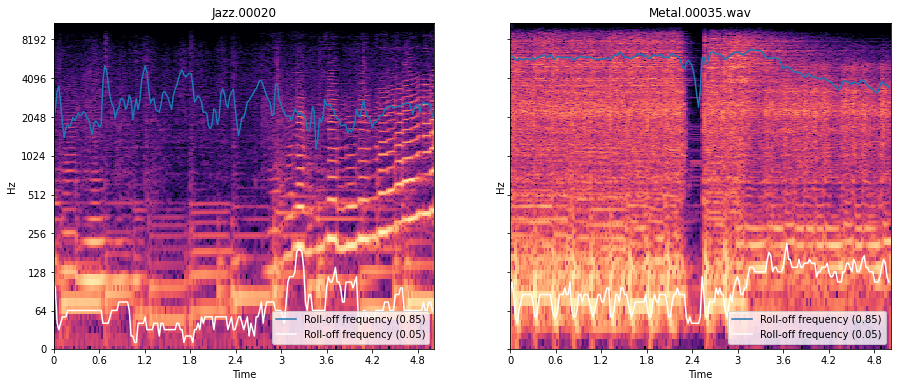

In [18]:
roll85_1 = librosa.feature.spectral_rolloff(S=S1, sr=sr, roll_percent=0.85)
roll85_2 = librosa.feature.spectral_rolloff(S=S2, sr=sr, roll_percent=0.85)
roll05_1 = librosa.feature.spectral_rolloff(S=S1, sr=sr, roll_percent=0.05)
roll05_2 = librosa.feature.spectral_rolloff(S=S2, sr=sr, roll_percent=0.05)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,6))
librosa.display.specshow(librosa.amplitude_to_db(S1, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax1)
ax1.plot(librosa.times_like(times), roll85_1[0], label='Roll-off frequency (0.85)')
ax1.plot(librosa.times_like(times), roll05_1[0], color='w', label='Roll-off frequency (0.05)')
ax1.legend(loc='lower right')
ax1.set(title='Jazz.00020')

librosa.display.specshow(librosa.amplitude_to_db(S2, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax2)
ax2.plot(librosa.times_like(times), roll85_2[0], label='Roll-off frequency (0.85)')
ax2.plot(librosa.times_like(times), roll05_2[0], color='w', label='Roll-off frequency (0.05)')
ax2.legend(loc='lower right')
ax2.set(title='Metal.00035.wav')

print("Average roloff 85% for Jazz.00020 is {:.2f} Hz with std deviation {:.2f} Hz".format(np.mean(roll85_1), np.std(roll85_1)))
print("Average roloff  5% for Jazz.00020 is {:.2f} Hz with std deviation {:.2f} Hz".format(np.mean(roll05_1), np.std(roll05_1)))
print("Average roloff 85% Metal.00035 is {:.2f} Hz with std deviation {:.2f} Hz".format(np.mean(roll85_2), np.std(roll85_2)))
print("Average roloff  5% for Metal.00035 is {:.2f} Hz with std deviation {:.2f} Hz".format(np.mean(roll05_2), np.std(roll05_2)))

### Low-Energy Feature:

The __Low-Energy feature__ is defined as the percentage of analysis windows (frames) that have less RMS energy than the average RMS energy across the texture window (5-second clip). As an example, vocal music with silences will have large low-energy value while continuous strings will have small low-energy value. 

We create a function that computes the low energy feature by first computing the root-mean-square (RMS) energy value for each frame of a spectrogram S and then computing the percentage of frames that are below the average RMS value.

Low-Energy feature for file Jazz.00020.wav  is 0.60
Low-Energy feature for file Metal.00035.wav is 0.50


[Text(0.5, 1.0, 'Metal.00035.wav')]

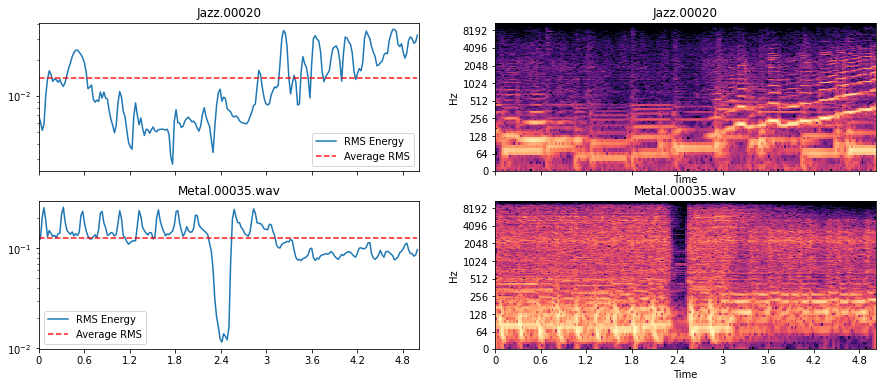

In [19]:
def computeLEfeature(S):
    """
    Computes low energy feature, i.e.,the percentage of frames
    that have less RMS energy than the average RMS energy across the clip

    Parameters
        ----------    
        S : np.ndarray [shape=(d, t)] or None
            (optional) spectrogram magnitude.

    Returns
        ----------
        le_feature : np.ndarray [shape=(1, t)]
            Low-Energy Feature
    """
    # Compute power spectrogram
    x = np.abs(S) ** 2

    # Adjust the DC and sr/2 component 
    x[0] *= 0.5
    x[-1] *= 0.5

    # Make sure to use frame_length that is even. Computed using spectrogram shape
    frame_length = (np.shape(S)[0] - 1) * 2 

    # Calculate power
    rms_power = np.sqrt(2 * np.sum(x, axis=0) / frame_length ** 2) # we need to divide by frame_length ** 2 cause librosa.stft
                                                                   # gives unormalized values in S (from 0 to frame_length) 
    avg_rms = np.mean(rms_power)

    low_energy = np.count_nonzero(rms_power < avg_rms - 1e-6) # we use this small threshold to prevent small computation errors.
                                                              # Ex. pure sine waves (constant RMS) would have wrong low_energy

    return low_energy / np.shape(S)[1]

## Example
rms1 = librosa.feature.rms(S=S1)
le_feature1 = computeLEfeature(S1)
rms2 = librosa.feature.rms(S=S2)
le_feature2 = computeLEfeature(S2)

print('Low-Energy feature for file Jazz.00020.wav  is {:.2f}'.format(le_feature1))
print('Low-Energy feature for file Metal.00035.wav is {:.2f}'.format(le_feature2))
times = librosa.times_like(rms1)

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15,6))
ax[0,0].semilogy(times, rms1[0], label='RMS Energy')
ax[0,0].semilogy(times, np.full_like(times, np.mean(rms1)), color='r', alpha=0.9, linestyle='--', label='Average RMS')
ax[0,0].set(title='Jazz.00020')
#ax[0,0].set(xticks=[])
ax[0,0].legend()
ax[0,0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S1, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0,1])
ax[0,1].set(title='Jazz.00020')

ax[1,0].semilogy(times, rms2[0], label='RMS Energy')
ax[1,0].semilogy(times, np.full_like(times, np.mean(rms2)), color='r', alpha=0.9, linestyle='--', label='Average RMS')
ax[1,0].set(title='Metal.00035.wav')
#ax[1,0].set(xticks=[])
ax[1,0].legend()
ax[1,0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S2, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1,1])
ax[1,1].set(title='Metal.00035.wav')

### Zero-Crossing Rate
__Zero-crossing Rate__ is a measure of the number of times in a given time interval/frame that the amplitude of a music/speech signal passes through a value of zero. The Zero crossingoccurs when successive samples have different algebraic signs. The rate at which zero-crossings occur is a simple measure of the frequency content of a signal.

The function `librosa.feature.zero_crossing_rate` computes the zero-crossing rate feature.


Average zero-crossing rate for file Jazz.00020.wav is 0.0263 with std deviation 0.0137
Average zero-crossing rate for file Metal.00035.wav is 0.1627 with std deviation of 0.0541


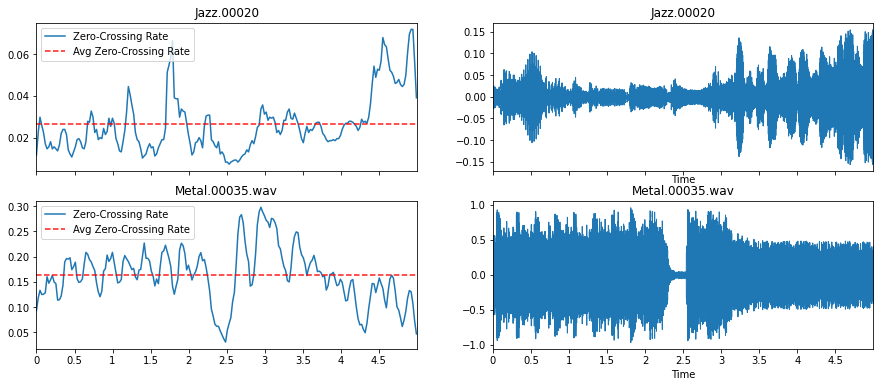

In [21]:
z1 = librosa.feature.zero_crossing_rate(y1, frame_length=2048, hop_length=512, center=True)
z2 = librosa.feature.zero_crossing_rate(y2, frame_length=2048, hop_length=512, center=True)

avg_z1 = np.mean(z1)
avg_z2 = np.mean(z2)


times = librosa.times_like(rms1)

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15,6))
ax[0,0].plot(times, z1[0], label='Zero-Crossing Rate')
ax[0,0].plot(times, np.full_like(times, avg_z1), color='r', alpha=0.9, linestyle='--', label='Avg Zero-Crossing Rate')
ax[0,0].set(title='Jazz.00020')
ax[0,0].legend()
ax[0,0].label_outer()

#librosa.display.specshow(librosa.amplitude_to_db(S1, ref=np.max),
#                         y_axis='log', x_axis='time', ax=ax[0,1])

librosa.display.waveplot(y1, sr=sr, ax=ax[0,1])
ax[0,1].set(title='Jazz.00020')

ax[1,0].plot(times, z2[0], label='Zero-Crossing Rate')
ax[1,0].plot(times, np.full_like(times, avg_z2), color='r', alpha=0.9, linestyle='--', label='Avg Zero-Crossing Rate')
ax[1,0].set(title='Metal.00035.wav')
ax[1,0].legend()
ax[1,0].label_outer()

#librosa.display.specshow(librosa.amplitude_to_db(S2, ref=np.max),
#                         y_axis='log', x_axis='time', ax=ax[1,1])
librosa.display.waveplot(y2, sr=sr, ax=ax[1,1])
ax[1,1].set(title='Metal.00035.wav')

print('Average zero-crossing rate for file Jazz.00020.wav is {:.4f} with std deviation {:.4f}'.format(avg_z1, np.std(z1)))
print('Average zero-crossing rate for file Metal.00035.wav is {:.4f} with std deviation of {:.4f}'.format(avg_z2, np.std(z2)))

### Average Tempo
The __Tempo__ of a music signal can give us information regarding the 
Estimate the tempo (in beats per minute) of a music clip. 

Can be computed using `librosa.beat.tempo` function

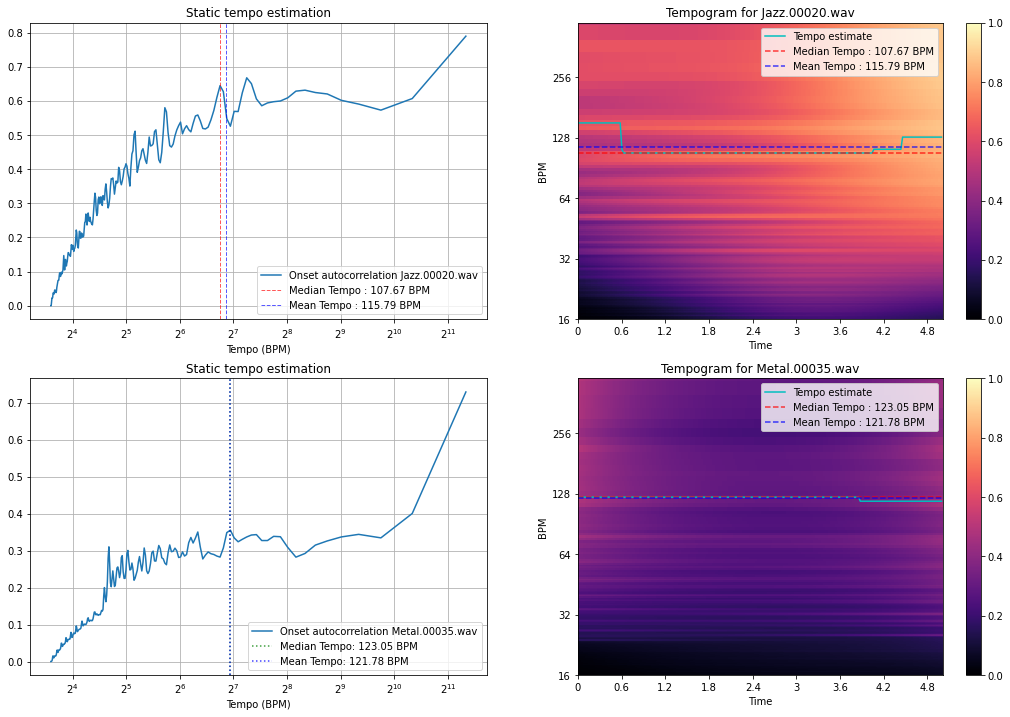

In [44]:
# Estimate a static tempo
onset_env1 = librosa.onset.onset_strength(y1, sr=sr)
onset_env2 = librosa.onset.onset_strength(y2, sr=sr)

# Estimate a dynamic tempo (a vector with tempo estimates for frame)
dtempo1 = librosa.beat.tempo(onset_envelope=onset_env1, sr=sr, aggregate=None)
dtempo2 = librosa.beat.tempo(onset_envelope=onset_env2, sr=sr, aggregate=None)

# Compute 2-second windowed autocorrelation
hop_length = 512
ac1 = librosa.autocorrelate(onset_env1, 5 * sr // hop_length)
ac2 = librosa.autocorrelate(onset_env2, 5 * sr // hop_length)
freqs1 = librosa.tempo_frequencies(len(ac1), sr=sr, hop_length=hop_length)
freqs2 = librosa.tempo_frequencies(len(ac2), sr=sr, hop_length=hop_length)

tg1 = librosa.feature.tempogram(onset_envelope=onset_env1, sr=sr, hop_length=hop_length)
tg2 = librosa.feature.tempogram(onset_envelope=onset_env2, sr=sr, hop_length=hop_length)


## On following plots observe that median value is better than mean for tempo estimation
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

# Plot Tempo and onset strength BPM axis.  We skip the first (0-lag) bin.
ax[0,0].semilogx(freqs1[1:], librosa.util.normalize(ac1)[1:], label='Onset autocorrelation Jazz.00020.wav', base=2)
ax[0,0].axvline(np.median(dtempo1), 0, 1, alpha=0.65, linestyle='--', linewidth=1, color='r', label='Median Tempo : {:.2f} BPM'.format(np.median(dtempo1)))
ax[0,0].axvline(np.mean(dtempo1), 0, 1, alpha=0.65, linestyle='--', linewidth=1, color='b', label='Mean Tempo : {:.2f} BPM'.format(np.mean(dtempo1)))
ax[0,0].set(xlabel='Tempo (BPM)', title='Static tempo estimation')
ax[0,0].grid(True)
ax[0,0].legend()

# Plot Tempo and onset strength BPM axis.  We skip the first (0-lag) bin.
ax[1,0].semilogx(freqs2[1:], librosa.util.normalize(ac2)[1:], label='Onset autocorrelation Metal.00035.wav', base=2)
ax[1,0].axvline(np.median(dtempo2), 0, 1, alpha=0.75, linestyle=':', color='g', label='Median Tempo: {:.2f} BPM'.format(np.median(dtempo2)))
ax[1,0].axvline(np.mean(dtempo2), 0, 1, alpha=0.75, linestyle=':', color='b', label='Mean Tempo: {:.2f} BPM'.format(np.mean(dtempo2)))
ax[1,0].set(xlabel='Tempo (BPM)', title='Static tempo estimation')
ax[1,0].grid(True)
ax[1,0].legend()

# Plot dynamic tempo estimates over a tempogram. Observe difference between using mean and median tempo value. 
img1 = librosa.display.specshow(tg1, x_axis='time', y_axis='tempo', cmap='magma', ax=ax[0,1])
ax[0,1].plot(librosa.times_like(dtempo1), dtempo1, color='c', linewidth=1.5, label='Tempo estimate')
ax[0,1].axhline(np.median(dtempo1), librosa.times_like(dtempo1)[0], librosa.times_like(dtempo1)[-1], alpha=0.75, linestyle='--', color='r', label='Median Tempo : {:.2f} BPM'.format(np.median(dtempo1)))
ax[0,1].axhline(np.mean(dtempo1), librosa.times_like(dtempo1)[0], librosa.times_like(dtempo1)[-1], alpha=0.75, linestyle='--', color='b', label='Mean Tempo : {:.2f} BPM'.format(np.mean(dtempo1)))
ax[0,1].set(title='Tempogram for Jazz.00020.wav')
ax[0,1].legend()

# Plot dynamic tempo estimates over a tempogram. Observe difference between using mean and median tempo value. 
img2 = librosa.display.specshow(tg2, x_axis='time', y_axis='tempo', cmap='magma', ax=ax[1,1])
ax[1,1].plot(librosa.times_like(dtempo2), dtempo2, color='c', linewidth=1.5, label='Tempo estimate')
ax[1,1].axhline(np.median(dtempo2), librosa.times_like(dtempo2)[0], librosa.times_like(dtempo2)[-1], alpha=0.75, linestyle='--', color='r', label='Median Tempo : {:.2f} BPM'.format(np.median(dtempo2)))
ax[1,1].axhline(np.mean(dtempo2), librosa.times_like(dtempo2)[0], librosa.times_like(dtempo2)[-1], alpha=0.75, linestyle='--', color='b', label='Mean Tempo : {:.2f} BPM'.format(np.mean(dtempo2)))
ax[1,1].set(title='Tempogram for Metal.00035.wav')
ax[1,1].legend()

fig.colorbar(img1, ax=[ax[0,1]])
fig.colorbar(img2, ax=[ax[1,1]])

### Mel-Frequency Cepstral Coefficients (MFCCs):
Mel-frequency cepstral coefficients are perceptually motivated features that are also based on the STFT. After taking the log-amplitude of the power spectrum, the FFT bins are grouped and smoothed according to the perceptually motivated Mel-frequency scaling.  Finally, a discrete cosine transform is applied in the Mel-Frenquency Power spectrum in order to obtain the MFCCs. Typically, 13 coefficients are used for speech representation. But since we have other features to help us, we are going to use only the first 5 MFCCs. Remember we have to use the mean and variance of those values across the 5-second clip, so we dont want to have too many similar features as input to our classifiers.

The function `librosa.melspectrogram` can compute mel spectrograms while `librosa.feature.mfcc` can compute the MFCCs

[Text(0.5, 1.0, 'Mel-Spec Metal.00035')]

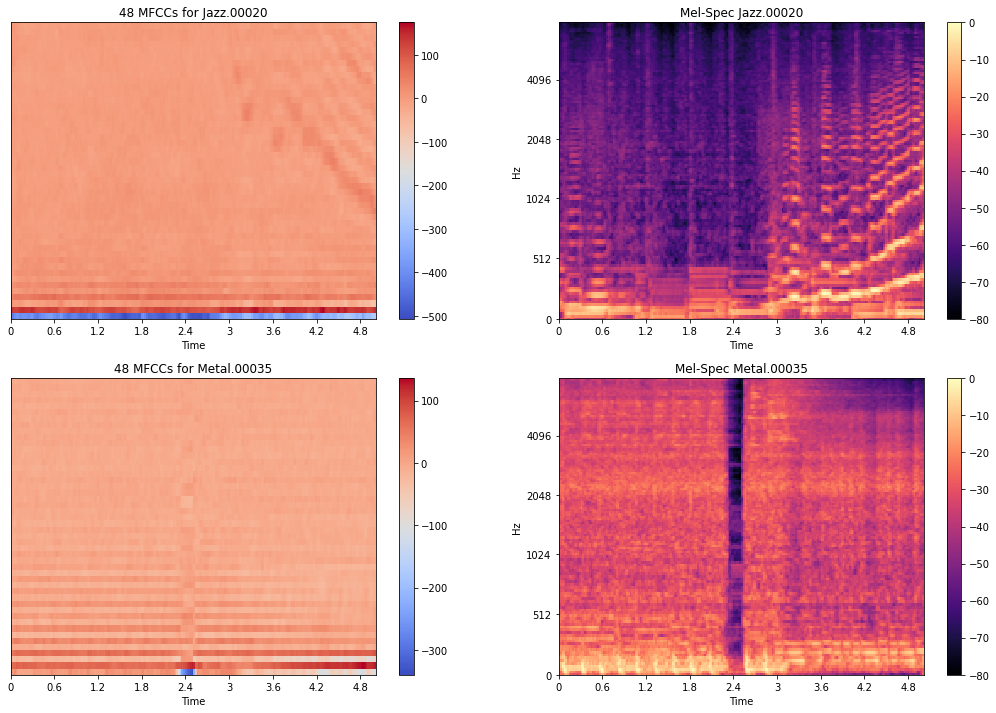

In [56]:
# compute mel spec and MFCC for example 1
S1 = librosa.feature.melspectrogram(y=y1, sr=sr, n_mels=128, fmax=8000)
S1_dB = librosa.power_to_db(S1, ref=np.max)
mfcc1= librosa.feature.mfcc(y=y1, n_mfcc=48)

# compute mel spec and MFCC for example 2
S2 = librosa.feature.melspectrogram(y=y2, sr=sr, n_mels=128, fmax=8000)
S2_dB = librosa.power_to_db(S2, ref=np.max)
mfcc2 = librosa.feature.mfcc(y=y2, n_mfcc=48)

# Plot MFCC
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
img = librosa.display.specshow(mfcc1, x_axis='time', ax=ax[0,0])
fig.colorbar(img, ax=ax[0,0])
ax[0,0].set(title='48 MFCCs for Jazz.00020')

# Plot MFCC
img = librosa.display.specshow(mfcc2, x_axis='time', ax=ax[1,0])
fig.colorbar(img, ax=ax[1,0])
ax[1,0].set(title='48 MFCCs for Metal.00035')

# Plot Mel-Spec
img = librosa.display.specshow(S1_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax[0,1])
fig.colorbar(img, ax=ax[0,1])
ax[0,1].set(title='Mel-Spec Jazz.00020')

# Plot Mel-Spec
img = librosa.display.specshow(S2_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax[1,1])
fig.colorbar(img, ax=ax[1,1])
ax[1,1].set(title='Mel-Spec Metal.00035')


## Preparing data - Computing features

Now that we have done an overview of the features, let's compute them for all the clips of GTZAN and save in a dataframe so we can use to train our classifiers.

In [2]:
import os
import librosa
import numpy as np
import tqdm
from tqdm.notebook import tqdm

fs = 22050  # Sampling frequency
n_fft = 2048 # window size for FFT
hop_length = 441 # N_samples to hop from a window to next when computing STFT
input_duration = 5*fs # input duration. We havee chosen 5 second clips
n_inputs = int(30*fs // input_duration)
n_frames_input = (input_duration - 1) // hop_length + 1

# variables to store features
clipnames = []
labels = []

centr, centr_std = [], [] 
roll85, roll85_std =  [], []
roll05, roll05_std = [], [],
zcr, zcr_std = [], []
tempo = []
lef = []

# mfcc features
mfcc0, mfcc0_std = [], []
mfcc1, mfcc1_std = [], []
mfcc2, mfcc2_std = [], []
mfcc3, mfcc3_std = [], []
mfcc4, mfcc4_std = [], []

data_path = os.path.join(os.getcwd(), 'dataset', 'genre')
paths = os.listdir(data_path)
genres = sorted(list(set([l for l in paths if os.path.isdir(os.path.join(data_path, l))])))

def STFT_pad(S, n_inputs, n_columns_input):
    """
    Pads the columns of matrix to make sure it is at leaest n_inputs*n_columns_input

    Parameters
        ----------    
        S : np.ndarray [shape=(d, t)]
            (required) any 2D matrix.
        
        n_inputs : int (required) number of inputs that matrix should generate.
        
        n_columns_input : int (required)number of columns in a single input

    Returns
        ----------
        S : np.ndarray [shape=(d, t) or shape=(d, n_inputs*n_columns_input)]
            S Padded
    """
    n_pad = n_inputs*n_columns_input - S.shape[1]
    if n_pad > 0:
        S = np.concatenate([S, S[:,-n_pad:]], axis=1)
    return S

def computeLEfeature(S):
    """
    Computes low energy feature, i.e.,the percentage of frames
    that have less RMS energy than the average RMS energy across the clip

    Parameters
        ----------    
        S : np.ndarray [shape=(d, t)] or None
            (optional) spectrogram magnitude.

    Returns
        ----------
        le_feature : np.ndarray [shape=(1, t)]
            Low-Energy Feature
    """
    # Compute power spectrogram
    x = np.abs(S) ** 2

    # Adjust the DC and sr/2 component 
    x[0] *= 0.5
    x[-1] *= 0.5

    # Make sure to use frame_length that is even. Computed using spectrogram shape
    frame_length = (np.shape(S)[0] - 1) * 2 

    # Calculate power
    rms_power = np.sqrt(2 * np.sum(x, axis=0) / frame_length ** 2) # we need to divide by frame_length ** 2 cause librosa.stft
                                                                   # gives unormalized values in S (from 0 to frame_length) 
    avg_rms = np.mean(rms_power)

    low_energy = np.count_nonzero(rms_power < avg_rms - 1e-6) # we use this small threshold to prevent small computation errors.
                                                              # Ex. pure sine waves (constant RMS) would have wrong low_energy

    return low_energy / np.shape(S)[1]

for g in tqdm(genres, desc='Processing files...'):
    filedir = os.path.join(data_path, g)
    for filename in tqdm(os.listdir(filedir), desc='Processing files of genre {}'.format(g)):
        #print('Computing Features for file {}'.format(filename))
        audio, fs = librosa.load(os.path.join(filedir, filename), sr=fs, mono=True)
        audio = audio/np.max(np.abs(audio)) # make sure it is from -1 to 1

        # Some features are comoputed directly on time-domain signal
        Z = librosa.feature.zero_crossing_rate(audio, frame_length=n_fft, hop_length=hop_length) # zero-crossing rate 
        T = librosa.beat.tempo(y=audio, sr=fs, hop_length=hop_length, aggregate=None)[np.newaxis,:] # Tempo (expand dimension to make it same shape as rest)
        MFCC= librosa.feature.mfcc(y=audio, sr=fs, n_fft=n_fft, hop_length=hop_length, n_mels=128, fmax=8000, n_mfcc=5) # MFCCS

        # Compute STFT
        S = librosa.stft(y=audio, n_fft=n_fft, hop_length=hop_length, win_length=n_fft)
        S, _ = librosa.magphase(S)
        
        # Little padding is done if input is less than 30 sec
        S = STFT_pad(S, n_inputs, n_frames_input)
        Z = STFT_pad(Z, n_inputs, n_frames_input)
        T = STFT_pad(T, n_inputs, n_frames_input)
        MFCC = STFT_pad(MFCC, n_inputs, n_frames_input)

        for i in range(n_inputs):
            clipname = filename.split('.wav')[0] + '_'+ str(i) + '.wav'

            s    = S[:,i*n_frames_input:(i+1)*n_frames_input]
            z    = Z[:,i*n_frames_input:(i+1)*n_frames_input]
            t    = T[:,i*n_frames_input:(i+1)*n_frames_input]
            mfcc = MFCC[:,i*n_frames_input:(i+1)*n_frames_input]

            ## Computing other feaatures and ignoring initial and last frames to avoid padding and windowing problems
            c = librosa.feature.spectral_centroid(S=s, sr=fs, n_fft=n_fft, hop_length=hop_length)[:,1:-1]
            r85 = librosa.feature.spectral_rolloff(S=s, sr=fs, n_fft=n_fft, hop_length=hop_length, roll_percent=0.85)[:,1:-1]
            r05 = librosa.feature.spectral_rolloff(S=s, sr=fs, n_fft=n_fft, hop_length=hop_length, roll_percent=0.05)[:,1:-1]
            
            clipnames.append(clipname)
            labels.append(g)
            centr.append(np.float32(np.mean(c)))
            centr_std.append(np.float32(np.std(c)))
            roll85.append(np.float32(np.mean(r85)))
            roll85_std.append(np.float32(np.std(r85)))
            roll05.append(np.float32(np.mean(r05)))
            roll05_std.append(np.float32(np.std(r05)))
            zcr.append(np.float32(np.mean(z[:,1:-1])))
            zcr_std.append(np.float32(np.std(z[:,1:-1])))
            tempo.append(np.float32(np.median(t[:,1:-1])))
            #tempo_std.append(np.float32(np.std(t[:,1:-1])))
            lef.append(np.float32(computeLEfeature(s[:,1:-1])))
            mfcc0.append(np.float32(np.mean(mfcc[0,1:-1])))
            mfcc1.append(np.float32(np.mean(mfcc[1,1:-1])))
            mfcc2.append(np.float32(np.mean(mfcc[2,1:-1])))
            mfcc3.append(np.float32(np.mean(mfcc[3,1:-1])))
            mfcc4.append(np.float32(np.mean(mfcc[4,1:-1])))
            mfcc0_std.append(np.float32(np.std(mfcc[0,1:-1])))
            mfcc1_std.append(np.float32(np.std(mfcc[1,1:-1])))
            mfcc2_std.append(np.float32(np.std(mfcc[2,1:-1])))
            mfcc3_std.append(np.float32(np.std(mfcc[3,1:-1])))
            mfcc4_std.append(np.float32(np.std(mfcc[4,1:-1])))

Processing files...:   0%|          | 0/10 [00:00<?, ?it/s]

Processing files of genre blues:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre classical:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre country:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre disco:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre hiphop:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre jazz:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre metal:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre pop:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre reggae:   0%|          | 0/100 [00:00<?, ?it/s]

Processing files of genre rock:   0%|          | 0/100 [00:00<?, ?it/s]

In [16]:
import pandas as pd

df = pd.DataFrame(list(zip(clipnames,
                           labels,
                           centr,
                           centr_std,
                           roll85, 
                           roll85_std,
                           roll05, 
                           roll05_std,
                           zcr, 
                           zcr_std,
                           tempo, 
                           #tempo_std,
                           lef, 
                           mfcc0, 
                           mfcc0_std, 
                           mfcc1, 
                           mfcc1_std, 
                           mfcc2, 
                           mfcc2_std, 
                           mfcc3, 
                           mfcc3_std, 
                           mfcc4, 
                           mfcc4_std)), columns = ['Name',
                                                   'Genre', 
                                                   'Centroid', 
                                                   'Centroid Std', 
                                                   'Rolloff 85%', 
                                                   'Rolloff 85% Std', 
                                                   'Rolloff 05%', 
                                                   'Rolloff 05% Std',
                                                   'Zero-Crossing Rate',
                                                   'Zero-Crossing Rate (Std)',
                                                   'Tempo',
                                                   #'Tempo Std',
                                                   'Low Energy Ratio',
                                                   'MFCC-0',
                                                   'MFCC-0 Std',
                                                   'MFCC-1',
                                                   'MFCC-1 Std',
                                                   'MFCC-2',
                                                   'MFCC-2 Std',
                                                   'MFCC-3',
                                                   'MFCC-3 Std',
                                                   'MFCC-4',
                                                   'MFCC-4 Std'])
# Saving as csv file
df.to_csv(os.path.join(os.path.split(data_path)[0], 'features.csv'), sep=',', index=False)  
df.describe()

,Centroid,Centroid Std,Rolloff 85%,Rolloff 85% Std,Rolloff 05%,Rolloff 05% Std,Zero-Crossing Rate,Zero-Crossing Rate (Std),Tempo,Low Energy Ratio,MFCC-0,MFCC-0 Std,MFCC-1,MFCC-1 Std,MFCC-2,MFCC-2 Std,MFCC-3,MFCC-3 Std,MFCC-4,MFCC-4 Std
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2201.922119,590.868652,4571.785156,1187.072632,112.459633,59.868095,0.103686,0.045285,120.343582,0.552811,-92.295990,51.475616,78.486862,22.809963,5.930103,18.225050,26.622734,13.797342,4.292621,11.204676
std,740.991577,289.507141,1621.709717,532.455322,47.584671,56.823704,0.044744,0.026114,20.995562,0.066240,79.107094,21.549187,30.905220,8.388162,18.692152,6.348655,12.417267,4.630610,9.936029,3.699050
min,487.338623,40.949333,674.649170,36.137295,7.380332,6.163525,0.013197,0.000223,50.000000,0.254032,-455.789642,5.903801,-9.826486,4.443730,-82.568314,3.794050,-24.909813,3.848355,-48.031536,3.373365
25%,1632.197632,375.361458,3377.120422,797.906738,82.442650,29.534762,0.068454,0.026909,103.448273,0.508065,-140.580448,36.524421,56.407467,16.550330,-6.195049,13.677958,18.663520,10.180909,-1.859551,8.387937
50%,2221.109375,539.945526,4645.962158,1117.375610,104.062675,44.733973,0.099010,0.039350,120.000000,0.552419,-79.202934,48.602036,73.669991,21.650426,6.046290,17.521512,26.090544,13.407832,4.493654,10.643127
75%,2710.977478,763.385208,5583.741699,1532.382446,130.197739,70.377396,0.133510,0.057595,130.434784,0.592742,-35.369526,63.876399,96.754633,28.009123,17.629910,21.997997,34.141916,16.834266,10.862838,13.519463
max,5416.672363,2102.137695,9478.342773,3463.227783,563.032471,999.683411,0.323098,0.221777,214.285721,0.854839,105.466560,217.326096,213.408585,78.354477,81.966560,49.060852,78.306297,33.834816,42.307087,30.686396


In [ ]:
import tensorflow as tf
import numpy as np

import sys
from packaging import version

if version.parse(tf.__version__) < version.parse("2.0"):
    from keras import layers, Model
else:
    from tensorflow.keras import layers, Model

class DenseBlock(layers.Layer):
    """A Dense block of convolutional layers."""

    def __init__(self, conv_filter, n_layers=4, k_factor=4, activations='relu', batch_norm=True, **kwargs):
        super(DenseBlock, self).__init__(**kwargs)
        
        if activations != 'relu' and activations != 'lrelu':
            raise ValueError ("Non-supported activation type '{}'".format(activations))
        
        self.conv_filter = conv_filter
        self.n_layers = int(n_layers)
        self.k_factor = k_factor
        self.activations = activations
        self.batch_norm = batch_norm
        
    def build(self, input_shape):
        self.conv_layers = [layers.Conv2D(self.k_factor, self.conv_filter, activation=None, padding='same', trainable=True) for _ in range(self.n_layers)]
        
        if self.batch_norm:
          self.batch_norm_layers = [layers.BatchNormalization(trainable=True) for _ in range(self.n_layers - 1)]
 
    def call(self, inputs):
        x = inputs
        for i, conv_layer in enumerate(self.conv_layers):
            y = conv_layer(x)
            
            if self.activations == 'relu':
              y = tf.nn.relu(y)
            if self.activations == 'lrelu':
              y = tf.nn.leaky_relu(y, alpha=0.3)
            
            if i < (self.n_layers - 1):
                x = tf.concat([y, x], axis=-1)
                if self.batch_norm:
                    x = self.batch_norm_layers[i-1](x)
        return y

    def get_config(self):
        config = super(DenseBlock, self).get_config()
        config.update({"conv_filter": self.conv_filter,
                        "n_layers" : self.n_layers,
                        "k_factor" : self.k_factor,
                        "activations": self.activations, 
                        "batch_norm": self.batch_norm})
        return config

class DenseConvStack(layers.Layer):
    def __init__(self,
                 conv_depth=4, 
                 kernel_shape_list=(3,3), 
                 k_factor_list=8, 
                 use_exp_channels=False, 
                 densenet_depth=4, 
                 max_pool_stride=[1,2,2,1],
                 activations='relu',  
                 batch_norm={'densenet':True, 'concat': True},
                 dropout={'concat': 0.25},
                 **kwargs):
        
        super(DenseConvStack, self).__init__(**kwargs)
        
        # Setting up 'kernel_shape_list' argument as always a list
        if type(kernel_shape_list) == tuple:
            if len(kernel_shape_list) == 2:
                kernel_shape_list = [kernel_shape_list]
            else:
                raise ValueError('The tuple used as \'kernel_shape_list\' must be 2D')
        
        elif type(kernel_shape_list) == int:
            kernel_shape_list = [(kernel_shape_list,1), (1, kernel_shape_list)]

        elif type(kernel_shape_list) == list:    
            if type(kernel_shape_list[0]) == list:
                for i,k in enumerate(kernel_shape_list):
                    assert len(k) == 2, "Make sure there are only 2D tuples or lists in \'kernel_shape_list\'"
                    if type(k) is list:
                        k = tuple(k)
                        kernel_shape_list[i] = k
                    else:
                        raise ValueError ('\'kernel_shape_list\' must be a list of 2D tuples or 2D lists.')
            elif len(kernel_shape_list) == 1:
                if type(kernel_shape_list[0]) == int:
                    kernel_shape_list = [(kernel_shape_list[0], 1), (1, kernel_shape_list[0])]
                elif type(kernel_shape_list[0]) == tuple:
                    assert len(kernel_shape_list[0]) == 2, "Make sure there are only 2D tuples in \'kernel_shape_list\'"
                else:
                    raise ValueError('\'kernel_shape_list\' must be a list of 2D tuples or a single integer number')
            else:
                for kernel in kernel_shape_list:
                    #assert len(kernel) == 2, "\'kernel_shape_list\' must be a list of 2D tuples or a single integer number"
                    assert (type(kernel) == tuple) and (len(kernel) == 2), "\'kernel_shape_list\' must be a list of 2D tuples or a single integer number"  
        ###else:
        ###    print('here2')
        ###    raise TypeError ('Wrong type for argument \'kernel_shape_list\'. It must be a list of 2D tuples or a single integer number')

        # k_factor_list must be a list with the same length as kernel_shape_list.
        # if a single int was used as argument, copy it into a list with the correct length
        if type(k_factor_list) is int:
            k_factor_list = [k_factor_list]*len(kernel_shape_list)
        elif len(k_factor_list) != len(kernel_shape_list):
            raise ValueError('k_factor_list must be a single integer or a list of integers with the same length as kernel_shape_list') 
        
        if dropout['concat'] is not None and dropout['concat'] != 0:
            assert (dropout['concat'] > 0 and dropout['concat'] < 1), "Invalid Dropout 'concat' Value. It should be a number between 0 and 1 or None."
                    
        self.conv_depth = conv_depth                         # number of convolutional layers
        self.kernel_shape_list = kernel_shape_list           # a list of tuples with the kernel shapes to be used in the convNets. Same length as k_factor_list
        self.k_factor_list = k_factor_list                   # a list of ints with the k_factor to be used in the DenseNets. Same length as kernel_shape_list
        self.n_branches = len(self.kernel_shape_list)
        self.use_exp_channels= use_exp_channels              # whether we should increase the number of channels exponentially(**2) in each downsample DenseLayer
        self.densenet_depth = densenet_depth                 # number of layers that each dense block is going to have
        self.max_pool_stride = max_pool_stride               # kernel shape and stride to use for max pool. Should be 4D like [1,2,2,1]. Use None or [1,1,1,1] to not perform max pool
        self.activations = activations                       # types of activation function to be used inside the model
        self.batch_norm = batch_norm
        self.dropout = dropout
        
    def build(self, input_shape):
        if self.use_exp_channels:
          self.dense_blocks = [DenseBlock(conv_filter=self.kernel_shape_list[i],
                                           n_layers=self.densenet_depth, 
                                           k_factor=self.k_factor_list[i]*(2**depth), 
                                           activations=self.activations, 
                                           batch_norm=self.batch_norm['densenet'],
                                           name='dense_block_branch{}_depth{}'.format(i, depth),
                                           trainable=True) for depth in range(self.conv_depth) for i in range(self.n_branches)]
        else:
          self.dense_blocks = [DenseBlock(conv_filter=self.kernel_shape_list[i],
                                           n_layers=self.densenet_depth, 
                                           k_factor=self.k_factor_list[i], 
                                           activations=self.activations, 
                                           batch_norm=self.batch_norm['densenet'],
                                           name='dense_block_branch{}_depth{}'.format(i, depth),
                                           trainable=True) for depth in range(self.conv_depth) for i in range(self.n_branches)]
        if self.batch_norm['concat']:
          self.batch_norm_layers = [layers.BatchNormalization(trainable=True) for _ in range(self.conv_depth - 1)]
    
    
    def call(self, inputs, training=None):
        x = inputs
        for depth in range(self.conv_depth):
            b = [0]*self.n_branches
            for i in range(self.n_branches):
                y = self.dense_blocks[(depth*self.n_branches) + i](x)   
                # Max pooling to downsample
                if self.max_pool_stride == [1,1,1,1] or self.max_pool_stride is None:
                    b[i] = b
                else:
                    b[i] = tf.nn.max_pool2d(y,  ksize=self.max_pool_stride, strides=self.max_pool_stride, padding='VALID')
            x = tf.concat(b, axis=-1)   
            
            if depth != (self.conv_depth - 1):
                x = self.batch_norm_layers[depth](x) if self.batch_norm['concat'] else x
                
                if depth != 0:
                    if training:
                        x = tf.nn.dropout(x, rate=self.dropout['concat'])
        return x

    def get_config(self):
        config = super(DenseConvStack, self).get_config()
        config.update({"conv_depth"       : self.conv_depth, 
                       "kernel_shape_list": self.kernel_shape_list, 
                       "k_factor_list"    : self.k_factor_list, 
                       "use_exp_channels" : self.use_exp_channels, 
                       "densenet_depth"   : self.densenet_depth, 
                       "max_pool_stride"  : self.max_pool_stride,
                       "activations"      : self.activations,  
                       "batch_norm"       : self.batch_norm,
                       "dropout"          : self.dropout})
        return config

In [8]:
45000 * 0.67

30150.0